# Cours PCD – Labo 4 : ACP sur des images


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

## 1) Description du jeu de données « Olivetti Faces »

Chargement du jeu de données et affichage de sa description intégrée:

In [2]:
olivetti = datasets.fetch_olivetti_faces()
print(olivetti["DESCR"])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [3]:
print(np.shape(olivetti["data"]))
print(np.shape(olivetti["images"]))
print(np.shape(olivetti["target"]))

(400, 4096)
(400, 64, 64)
(400,)


On apprend que le jeu de données de 400 images contient 3 parties:

* `data` qui contient les données des images (valeurs des pixels en N&B de 0 à 1) avec 4096 dimensions (pixels) pour chaque image.
* `images` qui contient les données des images sous forme de matrices 64x64.
* `target` qui contient les 40 classes (personnes) du jeu de données, ce qui correspond à 10 par classe.

### b) Nombre de personnes représentées

Il y a 40 personnes représentées avec 10 photos par personne.

### c) Information sur les images

Les images ont une taille de 64 par 64, soit 4096 pixels.

Les images sont encodées en noirs et blancs, avec 256 niveaux de gris (8 bits). Ces valeurs sont actuellement chargées en tant que _float_ compris dans [0, 1], au lieu d'un nombre entier compris dans [0, 255].

In [4]:
len(np.unique(olivetti["data"], axis=0))

400

On constate qu'il n'y a pas d'images dupliquées.

### d) Affichage d'un exemple d'image

In [5]:
def img_plot(img_data):
    fig=plt.figure()
    fig.add_subplot(xticks=[], yticks=[])
    ax = plt.imshow(img_data,cmap=plt.cm.bone)

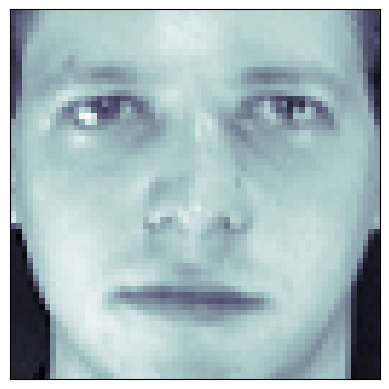

In [6]:
img_plot(olivetti["images"][0])

## 2) Préparation des jeux de données

In [61]:
def x_y_split(df, lab_col):
    return df.drop(lab_col, axis=1), df[lab_col] 

In [94]:
def olivetti_train_test_split(data, target, n_classes=10, train_ratio=0.8):
    df = pd.DataFrame(data)
    df["target"] = target
    
    train = df[df.index % n_classes < int(train_ratio * 10)]
    test = df.drop(train.index)
    
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    
    x_train, y_train = x_y_split(train, "target")
    x_test, y_test = x_y_split(test, "target")
    return (x_train, y_train), (x_test, y_test)

In [95]:
(x_train, y_train), (x_test, y_test) = olivetti_train_test_split(olivetti["data"], olivetti["target"])

In [98]:
print(f"x_train:\t{np.shape(x_train)}")
print(f"y_train:\t{np.shape(y_train)}")
print(f"x_test :\t{np.shape(x_test)}")
print(f"y_test :\t{np.shape(y_test)}")

x_train:	(320, 4096)
y_train:	(320,)
x_test :	(80, 4096)
y_test :	(80,)


On constate que les dimensions correspondent au ratio de 80% pour l'entraînement et 20% pour le test.